In [2]:
import numpy as np
from scipy import  fftpack as fft
from scipy import signal
from matplotlib import pyplot as plt

In [3]:
#Declaración de ubicación de las señales
path = '/Users/josec/OneDrive/Documentos/MCIB-19-P/data/'
fname1= 'first.txt'
fname2= 'second tab.txt'
fname3 = 'third.txt'
fname4 = 'four tab.txt'
fname5 = 'five.txt'
fs = 1000

lavel = ['Primera Etapa','Segunda etapa', 'Tercera etapa','Cuarta etapa','Quinta etapa']



In [4]:
data=[]


In [5]:
#Lectura de las señales
data.append(np.loadtxt(path+fname1))
data.append(np.loadtxt(path+fname2))
data.append(np.loadtxt(path+fname3))
data.append(np.loadtxt(path+fname4))
data.append(np.loadtxt(path+fname5))

In [39]:
CW = signal.chebwin
BC   = signal.boxcar
BL = signal.bartlett
HM  = signal.hamming
HN  = signal.hanning
BM = signal.blackman

In [40]:
#Función para aplicar 3 ventanas a la señal deseada
def fftv(s,fm):
    F = fft.fft(s)
    F = 20*np.log10(np.abs(F))
    N= F.shape[0]
    W1 = CW(N,at=100)
    W2 = BL(N)
    W3 = BM(N)
    Fw1 = fft.fft(s*W1)
    Fw1 = 20*np.log10(np.abs(Fw1))
    Fw2 = fft.fft(s*W2)
    Fw2 = 20*np.log10(np.abs(Fw2))
    Fw3 = fft.fft(s*W3)
    Fw3 = 20*np.log10(np.abs(Fw3))
    
    f = np.linspace(0,sr/2,N//2)
    
    plt.figure(figsize=(12,8))
    plt.plot(f[0:N//8],Fw1[0:N//8], color ='black')
    plt.plot(f[0:N//8],Fw2[0:N//8], color ='red')
    plt.plot(f[0:N//8],Fw3[0:N//8], color ='green')
    plt.plot(f[0:N//8],F[0:N//8], color ='blue')
    plt.legend(['FFT con ventana Chebwin', 'FFT con ventana Barlett','FFT con ventana Blackman', 'FFT sin ventana'])
    plt.grid(True)
    plt.show()


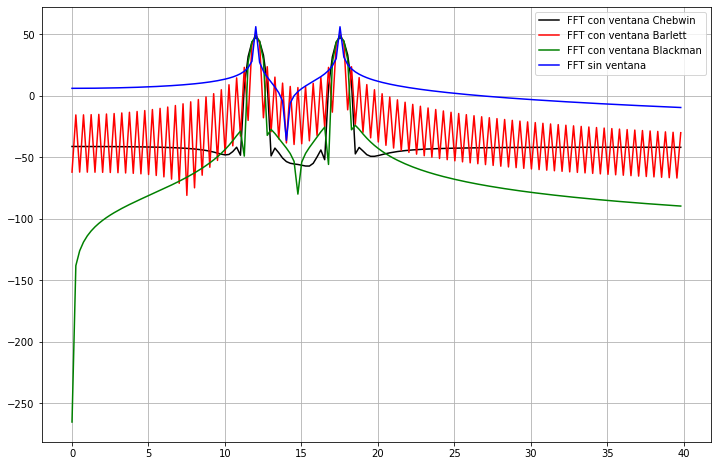

In [41]:
#Parámetros señal
sr = 320
L = 4
t = np.linspace(0,L,L*sr)
s = np.cos(2*np.pi*12*t) + np.cos(2*np.pi*17.5*t)

fftv(s,sr)

In [47]:
def fft_c(s,fm):
    F = fft.fft(s)
    F = 20*np.log10(np.abs(F))
    N= F.shape[0]
    W = CW(N,at=100)
    Fw = fft.fft(s*W)
    Fw = 20*np.log10(np.abs(Fw))
    f = np.linspace(0,fm/2,N//2)
    plt.figure()
    plt.plot(f[0:N//8],F[0:N//8],label=lavel[i])
    plt.grid(True)

    

In [35]:
#Punto 2. Función que el PSD con el algoritmo de Welch 
def PSDW(s,le,pt): #s es señal, le es longitud de épocas y pt es porcentaje traslape
    

In [19]:
#Punto 3. Evaluar la respuesta en frecuencia de los filtros
def RF(den,num,fm):
    w, h = signal.freqz(den,num)
    h[h==0] = 1E-5

    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,fm/2,H.shape[0] )

    return w, W, H

In [ ]:
#Función para quitar la linea de tendencia mediante la pseudoinversa
def pseudo(x):
    
    u,s,vh = np.linalg(x,full_matrices=True, compute_uv=True, hermitian=False)
    

In [28]:
#ACTIVIDAD 2
#Punto 1. Estimar el espectro para cada una de las senales adquiridas en la Práctica 0.

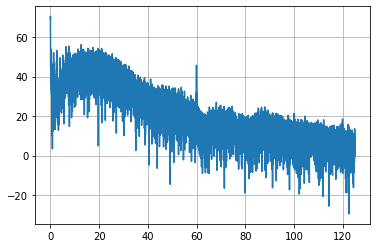

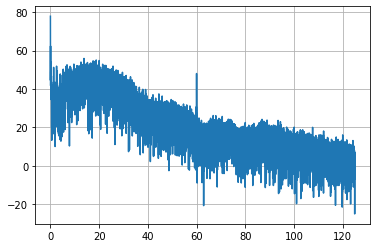

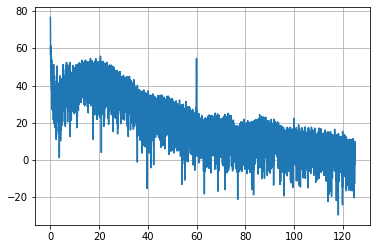

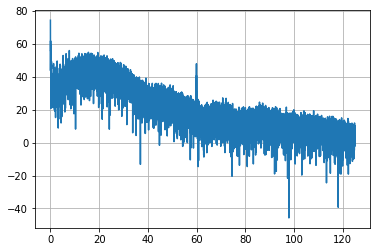

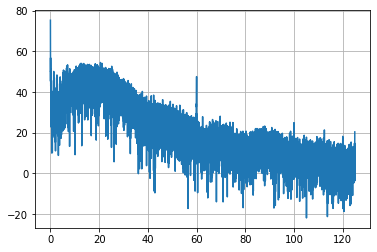

In [48]:
for i in range(len(lavel)):
        fft_c(data[i][:,3],fs)


In [47]:
#Filtro Butterworth Pasa Banda
def filt_bp(s,fm):
    
    n = 1 #orden del filtro
    fc = 2*np.array([.5,58])/fm  #Frecuencia de Corte ya normalizada
    b,a = signal.butter(n,fc, btype='bandpass')
        
    s_filbp = signal.filtfilt(b,a,s)
    
    
    return s_filbp





In [73]:
#c
def coe_lp(s):
    
    n = 2 #orden del filtro
    fc = 2*30/fm  #Frecuencia de Corte ya normalizada
    b,a = signal.butter(n,fc, btype='low')

    return s_fillp

In [74]:
a = filt_bp(data[1][:,4],fs)
b= filt_lp(data[1][:,2],fs)

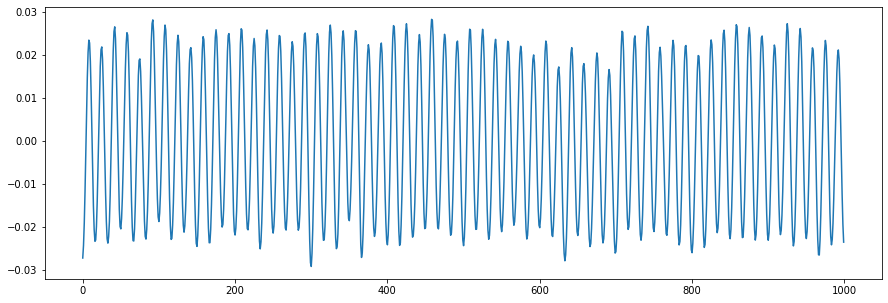

In [52]:
plt.figure(figsize=(15,5))
plt.plot(a[3000:4000])

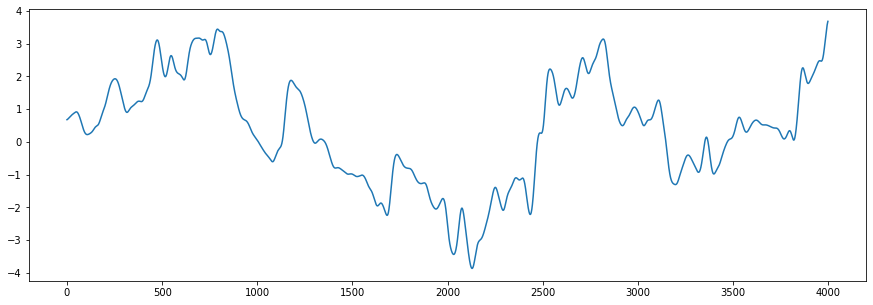

In [76]:
plt.figure(figsize=(15,5))
plt.plot(b[1000:5000])

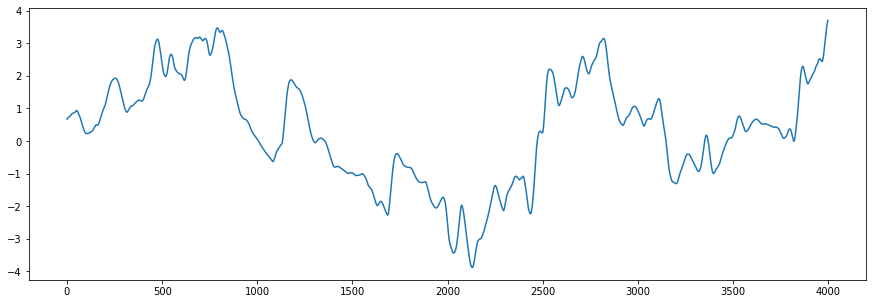

In [75]:
plt.figure(figsize=(15,5))
plt.plot(data[1][:,2][1000:5000])

In [109]:
# Filtrado de señales
 #Declaración de las señales a filtrar
oxi_1 = data[1][:,1]   #Oxímetro primer registro
oxi_2 = data[3][:,1]   #Oxímetro segundo registro
respi_1 = data[1][:,2]   #Resporigrama primer registro
respi_2 = data[3][:,2]   #Respirograma segundo registro
ecg_1 = data[1][:,3]   #ECG primer registro
ecg_2 = data[3][:,3]   #ECG segundo registro
emg_1 = data[1][:,4]   #EMG primer registro
emg_2 = data[3][:,4]   #EMG segundo registro



In [110]:
#Diseño de los Filtros

fc1 = 2*np.array([.5,58])/fs  #Frecuencia de Corte ya normalizada del Pasa Banda  entre .5 y 58Hz
b1,a1 = signal.butter(3,fc1, btype='band') #Diseño Pasa Banda
fc2 = 2*30/fs  #Frecuencia de Corte ya normalizada para 30 Hz
b2,a2 = signal.butter(3,fc2, btype='low') #Diseño pasa bajas
        

In [111]:
#Filtrado de las Señales
oxi_1_fil = signal.filtfilt(b2,a2,oxi_1)  #Señal oxímetro registro 1
oxi_2_fil = signal.filtfilt(b2,a2,oxi_2)   #Señal oxímetro registro 2
respi_1_fil = signal.filtfilt(b2,a2,respi_1)  #Señal respirograma registro 1
respi_2_fil = signal.filtfilt(b2,a2,respi_2)  #Señal respirograma registro 2
ecg_1_fil = signal.filtfilt(b1,a1,ecg_1)   #Señal ECG registro 1
ecg_2_fil = signal.filtfilt(b1,a1,ecg_2)  #Señal ECG registro 2
emg_1_fil = signal.filtfilt(b1,a1,emg_1)   #Señal EMG registro 1
emg_2_fil = signal.filtfilt(b1,a1,emg_2)  #Señal EMG registro 2


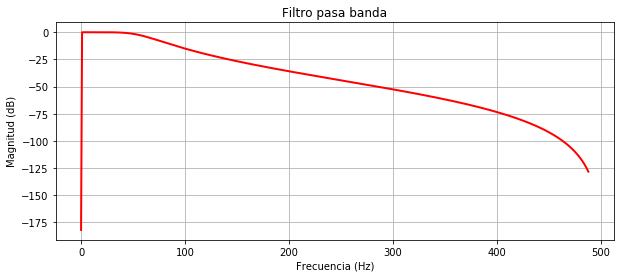

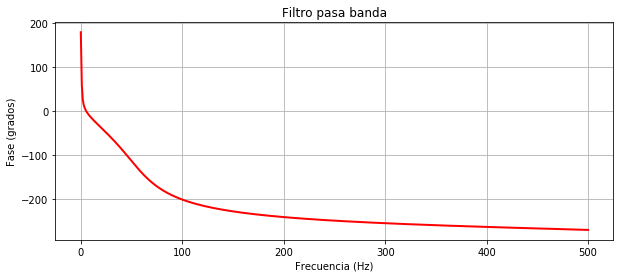

In [105]:
#Evaluación Respuesta en frecuencia del filtro
w1,W1,H1 = RF(b1,a1,fs)
w2,W2,H2 = RF(b2,a2,fs)
#Graficar la Magnitud Pasa banda
plt.figure(figsize=(10,4))
plt.plot(w1[0:500],H1[0:500],'r',linewidth=2)
plt.title("Filtro pasa banda")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid(True)
plt.show()
#Graficar la Fase Pasa Banda
plt.figure(figsize=(10,4))
plt.plot(w1,W1,'r',linewidth=2)
plt.title("Filtro pasa banda")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (grados)")
plt.grid(True)
plt.show()


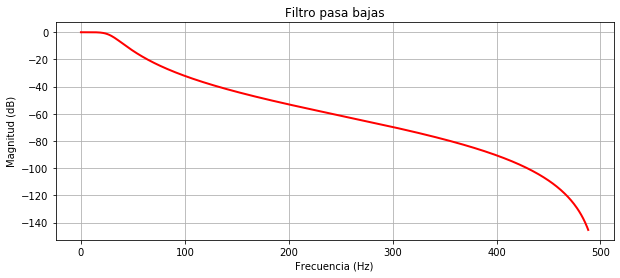

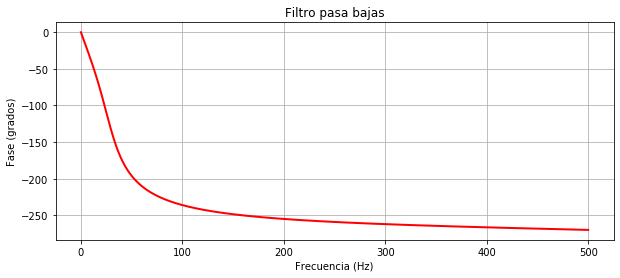

In [106]:
#Graficar la Magnitud Pasa bajas
plt.figure(figsize=(10,4))
plt.plot(w2[0:500],H2[0:500],'r',linewidth=2)
plt.title("Filtro pasa bajas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid(True)
plt.show()
#Graficar la Fase Pasa Bajas
plt.figure(figsize=(10,4))
plt.plot(w2,W2,'r',linewidth=2)
plt.title("Filtro pasa bajas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (grados)")
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

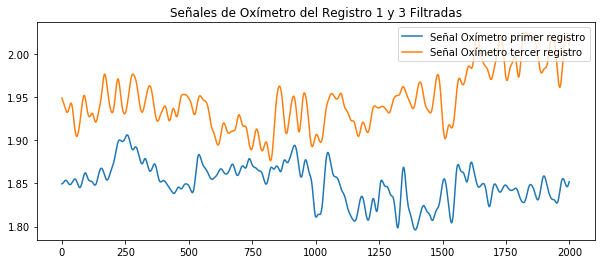

In [134]:
#Señales Filtradas
#Oxímetro
plt.figure(figsize=(10,4))
plt.plot(oxi_1_fil[1000:3000], label = 'Señal Oxímetro primer registro')
plt.legend(loc = 'upper right')
plt.plot(oxi_2_fil[1000:3000], label = 'Señal Oxímetro tercer registro')
plt.legend(loc = 'upper right')
plt.title('Señales de Oxímetro del Registro 1 y 3 Filtradas')

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

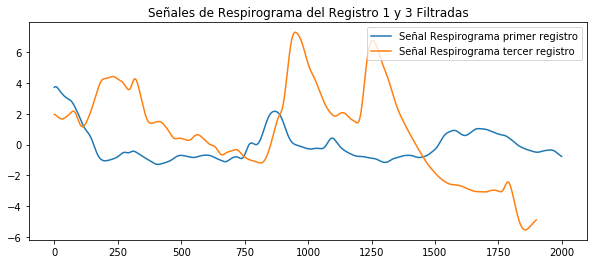

In [139]:
#Respirograma
plt.figure(figsize=(10,4))
plt.plot(respi_1_fil[5000:7000], label = 'Señal Respirograma primer registro')
plt.legend(loc = 'upper right')
plt.plot(respi_2_fil[100:2000], label = 'Señal Respirograma tercer registro')
plt.legend(loc = 'upper right')
plt.title('Señales de Respirograma del Registro 1 y 3 Filtradas')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

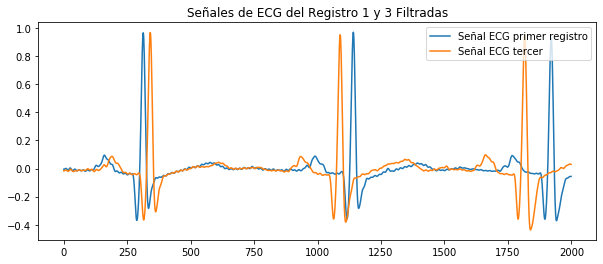

In [131]:
#ECG
plt.figure(figsize=(10,4))
plt.plot(ecg_1_fil[2000:4000], label = 'Señal ECG primer registro')
plt.legend(loc = 'upper right')
plt.plot(ecg_2_fil[2000:4000], label = 'Señal ECG tercer registro')
plt.legend(loc = 'upper right')
plt.title('Señales de ECG del Registro 1 y 3 Filtradas')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

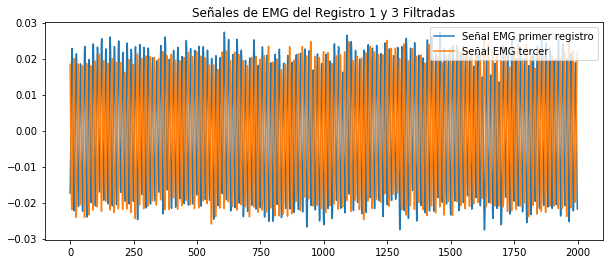

In [132]:
#Oxímetro
plt.figure(figsize=(10,4))
plt.plot(emg_1_fil[2000:4000], label = 'Señal EMG primer registro')
plt.legend(loc = 'upper right')
plt.plot(emg_2_fil[2000:4000], label = 'Señal EMG tercer registro')
plt.legend(loc = 'upper right')
plt.title('Señales de EMG del Registro 1 y 3 Filtradas')

plt.showS